In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
l2_6000_run = pd.read_csv(
    f"compute_dummy_RTX6000Ada_gpu_1024*M*1024.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", "utilization", 'flops']
)
l2_6000_run.set_index(["M"], inplace=True)

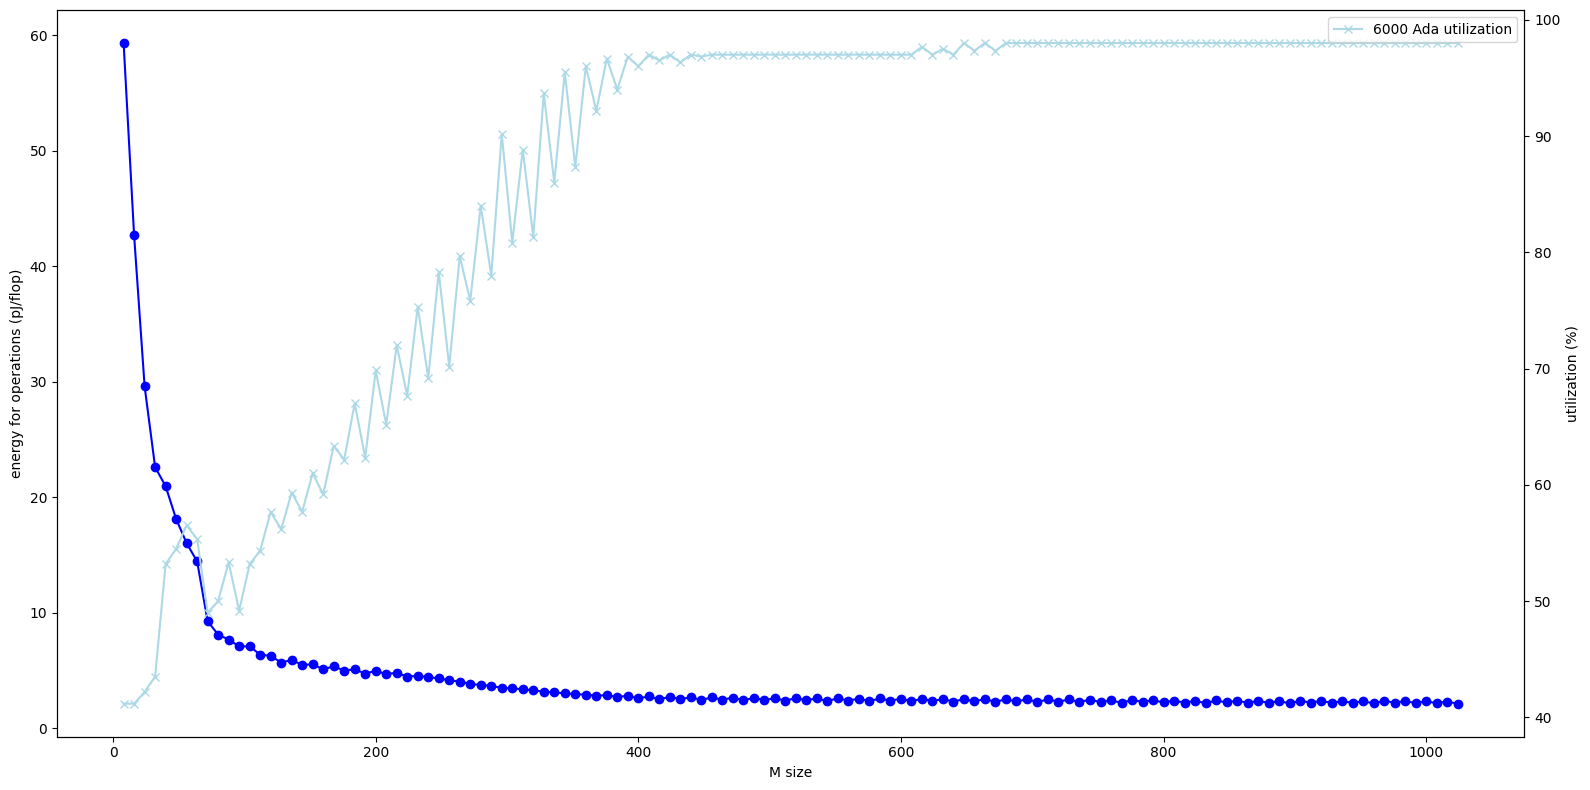

In [11]:
M_list = []
energy_6000_run_list = []
energy_6000_per_flop_list = []
utilization_6000_list = []
for M in range(8, 1024 + 1, 8):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_flop_list.append(l2_6000_run.loc[M, "energy"] / l2_6000_run.loc[M, "flops"])
    utilization_6000_list.append(l2_6000_run.loc[M, "utilization"])
    
    
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlabel("M size")
ax1.plot(M_list, energy_6000_per_flop_list, marker="o", label=f"6000 Ada energy per flop", color='blue')
ax1.set_ylabel('energy for operations (pJ/flop)')

ax2 = ax1.twinx()
ax2.plot(M_list, utilization_6000_list, marker="x", label=f"6000 Ada utilization", color='lightblue')
ax2.set_ylabel('utilization (%)')


plt.legend()
plt.tight_layout()
plt.show()